# PRÁCTICAS DE REDES NEURONALES ARTIFICIALES (TSCAO): Parte V

## 5. ANÁLISIS DE SENTIMIENTOS. EL CONJUNTO DE DATOS IMDB

**¿QUÉ ES EL ANÁLISIS DE SENTIMIENTOS?**

El análisis de sentimientos tiene como objetivo determinar la actitud o el sentimiento ya sea de un orador o escritor con respecto a un documento, interacción o evento. Se considera un problema de procesamiento del lenguaje natural en el que es necesario comprender el texto para predecir la intención subyacente en él.

El sentimiento se clasifica principalmente en categorías positivas, negativas y neutras. A través del análisis de sentimientos, es posible que deseemos predecir, por ejemplo, la opinión y la actitud de un cliente sobre un producto en función de una reseña que escribió. Esta técnica se aplica ampliamente a temas como revisiones, encuestas, documentos y mucho más.

**EL CONJUNTO DE DATOS DE IMDB**

El conjunto de datos de clasificación de sentimientos de IMDB consta de 50.000 reseñas de películas de usuarios de IMDB que están etiquetadas como positivas (1) o negativas (0). Las reseñas están preprocesadas y cada una está codificada como una secuencia de índices de palabras en forma de números enteros. Las palabras dentro de las revisiones están indexadas por su frecuencia general dentro del conjunto de datos. Por ejemplo, el número entero "2" codifica la segunda palabra más frecuente en los datos.

Los 50.000 ejemplos se dividen en 25.000 que habitualmente se utilizan para entrenamiento y 25.000 para test.

El conjunto de datos fue creado por investigadores de la Universidad de Stanford y publicado en un artículo de 2011, donde lograron un 88,89% de precisión. También se utilizó en el concurso de Kaggle "Bag of Words Meets Bags of Popcorn" en 2011.

**IMPORTACIÓN DE DEPENDENCIAS Y OBTENCIÓN DE DATOS**

Comenzaremos importando las librerías que nos proporcionarán las dependencias necesarias para
preprocesar nuestros datos y construir nuestro modelo:

In [1]:
# Importando las librerias
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt

**NOTA**: Keras tiene algún cambio reciente que provoca problemas para cargar el conjunto de datos IMDB. Por esta razón se deberá usar Numpy, versión 1.16.2. También con versiones previas a la actual de Keras funciona correctamente.

El conjunto de datos IMDB se encuentra integrado en Keras. Keras proporciona acceso al conjunto de datos IMDB que tiene incorporado. La función _imdb.load _data()_ permite cargar el conjunto de datos en un formato que estará listo para utilizarse con redes neuronales. Las palabras han sido reemplazadas como hemos visto anteriormente por números enteros y su frecuencia general dentro del conjunto de datos. Por lo tanto, cada reseña en el conjunto de ejemplos estará representada por una secuencia de enteros.

Llamando a _imdb.load_data()_ la primera vez descargará el conjunto de datos IMDB en su PC guardándolo en tu directorio home bajo _~/.keras/datasets/imdb.pkl_ como un archivo de 32 megabytes.

Útilmente, la función imdb.load_data() proporciona argumentos adicionales incluyendo el número de palabras superiores a cargar (donde las palabras con un número entero inferior se marcan como cero en los datos devueltos), el número de palabras principales a omitir y la duración máxima de las revisiones.

Como queremos tenemos una división de datos de entrenamiento/test del 80/20 fusionaremos los datos en un único fichero para poder utilizarlos posteriormente según esa proporción.

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Ahora podemos comenzar a explorar el conjunto de datos. Veamos de cuantos datos disponemos:

In [3]:
# summarize size
print("dataset a entrenar: ")
print(X.shape)
print(y.shape)

dataset a entrenar: 
(50000,)
(50000,)


Podemos observar que tenemos en total unos 50000 ejemplos.
Podemos ver las clases que tenemos:

In [4]:
# numero de clases
print("Clases: ")
print(np.unique(y))

Clases: 
[0 1]


Podemos ver en el resultado anterior que el conjunto de datos está etiquetado en dos categorías, 0 o 1, que representa el sentimiento de la revisión, bueno=1 y malo=0.

El conjunto de datos completo contiene 88585 palabras y la extensión promedio de la revisión es de 234 palabras, con una desviación estándar de 173 palabras. Esto podemos verlo con el código siguiente:

In [5]:
# palabras únicas del conjunto de datos
print("número de palabras: ")
print(len(np.unique(np.hstack(X))))

número de palabras: 
88585


Con este código podemos ver la longitud media de las palabras:

In [6]:
# Longitud
print("Longitud: ")
result = [len(x) for x in X]
print("Media %.2f palabras (%f)" % (np.mean(result), np.std(result)))

Longitud: 
Media 234.76 palabras (172.911495)


Ahora pintaremos un grafico de cajas y bigotes y el histograma de longitudes de palabras. Si observamos el gráfico de cajas y bigotes y el histograma de las longitudes, podemos ver una distribución exponencial que puede cubrir la masa de la distribución con una longitud recortada de 400 a 500 palabras.

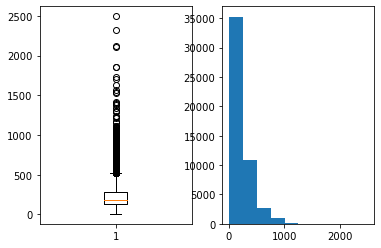

In [7]:
# ploteamos la Longitud un boxplot y el histograma
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

A continuación, vamos a ver qué aspecto tienen los ejemplos:

In [8]:
print("Label:", y[0])

print(X[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Como podemos observar en la imagen, el primer ejemplo está etiquetado como positivo (1). El
siguiente código recupera los índices de palabras de mapeo del diccionario en las palabras
originales para que podamos leerlas. Reemplaza cada palabra desconocida con un "#". Hace esto usando la función _get_word_index()_.

In [9]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]])
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be

**¿COMO TRATARIAMOS ESTE PROBLEMA CON UNA RED FEEDFORWARD?**

Comenzaremos por importar las clases y funciones necesarias para este modelo e inicializar el generador de números aleatorios a un valor constante para asegurarnos de que podemos reproducir fácilmente los resultados.

In [10]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# semilla aleatoria de reproducibilidad
seed = 7

np.random.seed(seed)

A continuación, cargaremos el conjunto de datos IMDB. Simplificaremos el conjunto de datos
usando “incrustraciones” de palabras. Sólo cargaremos las 5.000 primeras palabras de cada reseña.

Utilizaremos una división del 50%/50% del conjunto de datos para entrenamiento y test si utilizamos el código que a continuación se expone Si se desea utilizar otra distribución utilizar el código que se plantea en el apartado anterior para una distribución del 80/20.
Limitaremos las reseñas a 500 palabras, truncando las revisiones más largas y completando con 0 las revisiones más cortas.

In [11]:
# carga del conjunto de datos pero sólo mantenemos las n palabras 
# principales, cero el resto
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [12]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

Ahora podemos crear nuestro modelo. Usaremos una capa de embedding como capa de entrada,
estableciendo el vocabulario en 5.000, el tamaño del vector de palabra con 32 dimensiones y la longitud de entrada (input_legth) de 500.


Aplanaremos la salida de las capas de embedding a una dimensión, luego usaremos una capa oculta densa de 250 unidades con función de activación de relu. La capa de salida tiene una neurona y usará una activación sigmoide con valores de salida de 0 y 1 como predicciones. El modelo utiliza el error logarítmico y se optimiza mediante el procedimiento de optimización de ADAM.

In [13]:
# creamos el modelo, recordad que:
# el número máximo de palabras del lexicón que usaremos seran 5000
# que la longitud máxima del parrafo es 500 y 
# la dimension del espacio  que se transforma cada palabra es 32
# Estos son los parametros del Embedding y por tanto la entrada a la 
# red estará formada por 500*32


model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


2022-03-06 06:20:32.615660: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


157/157 [==============================] - 9s 57ms/step - loss: 0.5542 - accuracy: 0.6953 - val_loss: 0.3351 - val_accuracy: 0.8524
Epoch 2/10
157/157 [==============================] - 9s 57ms/step - loss: 0.2065 - accuracy: 0.9197 - val_loss: 0.2985 - val_accuracy: 0.8782
Epoch 3/10
157/157 [==============================] - 9s 57ms/step - loss: 0.0719 - accuracy: 0.9791 - val_loss: 0.3867 - val_accuracy: 0.8662
Epoch 4/10
157/157 [==============================] - 9s 59ms/step - loss: 0.0149 - accuracy: 0.9980 - val_loss: 0.4530 - val_accuracy: 0.8694
Epoch 5/10
157/157 [==============================] - 10s 61ms/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.5165 - val_accuracy: 0.8682
Epoch 6/10
157/157 [==============================] - 10s 66ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5355 - val_accuracy: 0.8702
Epoch 7/10
157/157 [==============================] - 10s 62ms/step - loss: 5.8720e-04 - accuracy: 1.0000 - val_loss: 0.5615 - val_accuracy: 0.8698
Epo

Utilizaremos el conjunto test como validación durante el entrenamiento. Este modelo se
sobreajusta muy rápidamente por lo que utilizaremos muy pocas épocas de entrenamiento, en este caso sólo 2. Hay muchos datos por lo que utilizaremos un tamaño de lote de 128. Después de que el modelo se ha entrenado, evaluaremos su precisión sobre el conjunto de test.

In [14]:
# ajustamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Evaluación final del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precisión: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 [==============================] - 15s 75ms/step - loss: 0.1217 - accuracy: 0.9626 - val_loss: 0.3927 - val_accuracy: 0.8612
Epoch 2/2
196/196 [==============================] - 15s 76ms/step - loss: 0.0140 - accuracy: 0.9966 - val_loss: 0.5723 - val_accuracy: 0.8630
Precisión: 86.30%


A continuación, se presenta un código para poder representar gráficamente la evolución tanto del
error y el tanto por ciento de aciertos del conjunto de entrenamiento y validación:

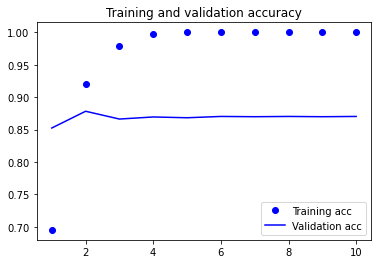

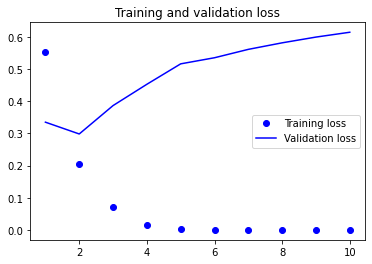

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**¿COMO TRATARIAMOS ESTE PROBLEMA CON UNA RED RECURRENTE?**

Únicamente habrá que sustituir la parte del código asociado a la red, el resto del código será el mismo.

En esta parte diseñamos la red neuronal:

In [16]:
from keras.layers import SimpleRNN
# creamos el modelo
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 25s 150ms/step - loss: 0.6227 - accuracy: 0.6420 - val_loss: 0.5535 - val_accuracy: 0.7258
Epoch 2/10
157/157 [==============================] - 23s 149ms/step - loss: 0.3987 - accuracy: 0.8308 - val_loss: 0.3896 - val_accuracy: 0.8330
Epoch 3/10
157/157 [==============================] - 23s 148ms/step - loss: 0.3274 - accuracy: 0.8609 - val_loss: 0.4264 - val_accuracy: 0.8060
Epoch 4/10
157/157 [==============================] - 24s 150ms/step - loss: 0.2608 - accuracy: 0.8948 - val_loss: 0.3737 - val_accuracy: 0.8518
Epoch 5/10
157/157 [==============================] - 23s 147ms/step - loss: 0.2066 - accuracy: 0.9208 - val_loss: 0.3945 - val_accuracy: 0.8590
Epoch 6/10
157/157 [==============================] - 27s 171ms/step - loss: 0.1610 - accuracy: 0.9401 - val_loss: 0.4372 - val_accuracy: 0.8414
Epoch 7/10
157/157 [==============================] - 32s 201ms/step - loss: 0.1165 - accuracy: 0.9578 - val_loss: 0.4968 - val_ac

A continuación, entrenamos la red y evaluamos con el conjunto test:

In [17]:
# ajustamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Evaluación final del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precisión: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 [==============================] - 36s 185ms/step - loss: 0.1766 - accuracy: 0.9423 - val_loss: 0.5693 - val_accuracy: 0.8089
Epoch 2/2
196/196 [==============================] - 38s 195ms/step - loss: 0.1162 - accuracy: 0.9610 - val_loss: 0.6581 - val_accuracy: 0.8137
Precisión: 81.37%


La visualización de los resultados, se haría de manera análoga al apartado anterior.

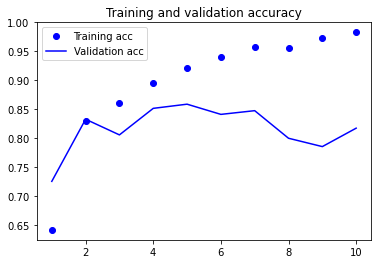

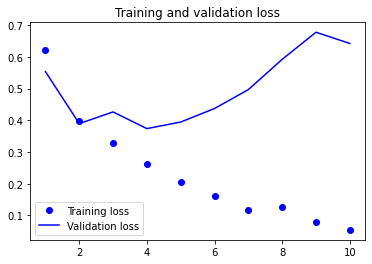

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**¿COMO TRATARIAMOS ESTE PROBLEMA CON UNA RED RECURRENTE LSTM?**

Al igual que en el caso anterior con respecto al código, únicamente habrá que sustituir la parte del código asociado a la red, el resto del código será el mismo.

En esta parte diseñamos la red LSTM:

In [19]:
from keras.layers import LSTM
# creamos el modelo
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 80s 493ms/step - loss: 0.5274 - accuracy: 0.7441 - val_loss: 0.3422 - val_accuracy: 0.8616
Epoch 2/10
157/157 [==============================] - 73s 462ms/step - loss: 0.3267 - accuracy: 0.8662 - val_loss: 0.3471 - val_accuracy: 0.8596
Epoch 3/10
157/157 [==============================] - 73s 464ms/step - loss: 0.2751 - accuracy: 0.8914 - val_loss: 0.4018 - val_accuracy: 0.8322
Epoch 4/10
157/157 [==============================] - 69s 442ms/step - loss: 0.2483 - accuracy: 0.9049 - val_loss: 0.3175 - val_accuracy: 0.8670
Epoch 5/10
157/157 [==============================] - 76s 481ms/step - loss: 0.2283 - accuracy: 0.9104 - val_loss: 0.3459 - val_accuracy: 0.8470
Epoch 6/10
157/157 [==============================] - 72s 460ms/step - loss: 0.2112 - accuracy: 0.9210 - val_loss: 0.2950 - val_accuracy: 0.8820
Epoch 7/10
157/157 [==============================] - 75s 480ms/step - loss: 0.1971 - accuracy: 0.9257 - val_loss: 0.4511 - val_ac

A continuación, entrenamos la red LSTM y evaluamos con el conjunto test:

In [20]:
# ajustamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Evaluación final del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precisión: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 [==============================] - 136s 696ms/step - loss: 0.2001 - accuracy: 0.9259 - val_loss: 0.3102 - val_accuracy: 0.8759
Epoch 2/2
196/196 [==============================] - 125s 641ms/step - loss: 0.1855 - accuracy: 0.9305 - val_loss: 0.3630 - val_accuracy: 0.8549
Precisión: 85.49%


Realizados estos pasos, ya podemos visualizar los resultados haciéndolo de manera análoga a los
casos anteriores.

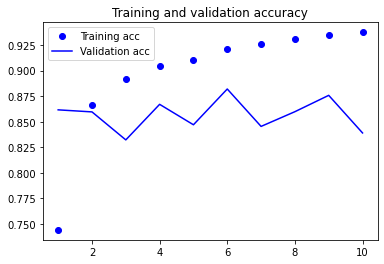

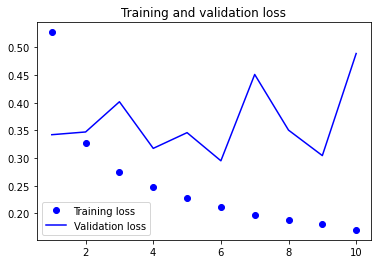

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# ESTUDIO EXPERIMENTAL

A partir de los códigos anteriores, realizar diversas ejecuciones con diferentes parámetros, configuraciones de red, etc. y recoger los resultados en varias tablas para poder comparar todos los modelos. Posteriormente, sacar conclusiones de los resultados asociados a los modelos concretos y comparar todos los modelos para evaluar la mejor topología encontrada en las diferentes ejecuciones.